In [2]:
### Imports and Settings 
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

In [3]:
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", color_codes=True)
rcParams['figure.figsize'] = 8,4

# Retrieivng Stock Returns Data

In [4]:
start = pd.Timestamp('2017-01-01')
end = pd.Timestamp('2020-12-31')

lloyData = web.DataReader('LLOY.L', 'yahoo', start, end)\
      [['Close']]
lloyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2017-01-03 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1012 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [10]:
lloyData.head()

,Close
Date,
2017-01-03,64.620003
2017-01-04,64.769997
2017-01-05,64.650002
2017-01-06,65.900002
2017-01-09,65.220001


In [11]:
pctReturn = 100*(lloyData['Close'].pct_change())
logReturn = np.log(lloyData['Close']).diff().mul(100)

In [16]:
logReturn = logReturn.dropna()
pctReturn = pctReturn.dropna()

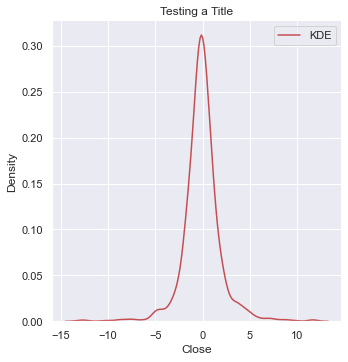

In [66]:
sns.displot(logReturn, kind = 'kde', color = 'r')
plt.legend(('KDE','Log Returns'))
plt.title("Testing a Title")
plt.show()

NameError: name 'X1' is not defined

## Fitting a GARCH Model

In [133]:
#11
aic = [0 for a in range(12)]
model = [0 for a in range(12)]
x = 0
for i in range(4):
    for j in range(0,4):
        if i == 0 & j == 0:
            next
        else:
            mdl = arch_model(logReturn,
                                   p = i,
                                   q = j,
                                   mean = 'constant',
                                   vol = 'GARCH',
                                   dist = 'skewt')
            res = mdl.fit(disp = 'off')
            print(f'GARCH({j},{i}) AIC: {res.aic}')
            aic[x] = res.aic
            model[x] ='GARCH (%s, %s)' %(j,i)
            x = x+1

            

GARCH(0,1) AIC: 3830.8689363869325
GARCH(1,1) AIC: 3683.894865740575
GARCH(2,1) AIC: 3685.630566940359
GARCH(3,1) AIC: 3686.571339189968
GARCH(0,2) AIC: 3771.8920745897553
GARCH(1,2) AIC: 3685.8948649977615
GARCH(2,2) AIC: 3687.766900657667
GARCH(3,2) AIC: 3683.462577995192
GARCH(0,3) AIC: 3755.1411430838625
GARCH(1,3) AIC: 3687.894865274139
GARCH(2,3) AIC: 3689.766900632565
GARCH(3,3) AIC: 3685.3354589678693


In [139]:
modelDict = dict(zip(model,aic))
modelDict

In [144]:
csvFile = pd.read_csv('agg.csv')
print(csvFile)
csvFile.shortProb

     Unnamed: 0        Date   returns  volForecast  shortProb shortSD  \
0             1  2020-01-02  0.019175     0.020620   0.025995      SD   
1             2  2020-01-03 -0.010413     0.020536   0.022662    Mean   
2             3  2020-01-06  0.003167     0.020177   0.013997    Mean   
3             4  2020-01-07 -0.002216     0.019737   0.003999    Mean   
4             5  2020-01-08 -0.005083     0.019289   0.002200      SD   
..          ...         ...       ...          ...        ...     ...   
248         249  2020-12-22  0.032665     0.030513   0.004999    Mean   
249         250  2020-12-23  0.067695     0.030444   0.005999    Mean   
250         251  2020-12-24  0.039091     0.032648   0.004399    Mean   
251         252  2020-12-29 -0.049108     0.032989   0.002333      SD   
252         253  2020-12-31  0.001495     0.033461   0.003999    Mean   

           week  scaleFactor  scaledVolatility  
0    2022-06-23     0.009562          0.030182  
1    2022-06-24    -0.004

0      0.025995
1      0.022662
2      0.013997
3      0.003999
4      0.002200
         ...   
248    0.004999
249    0.005999
250    0.004399
251    0.002333
252    0.003999
Name: shortProb, Length: 253, dtype: float64

In [151]:
#aic = [0 for a in range(12)]
#model = [0 for a in range(12)]
#x = 0
for i in range(4):
    for j in range(0,4):
        if i == 0 & j == 0:
            next
        else:
            mdl = arch_model(csvFile['shortProb'],
                                   p = i,
                                   q = j,
                                   mean = 'constant',
                                   vol = 'GARCH',
                                   dist = 'normal')
            res = mdl.fit(disp = 'off')
            print(f'GARCH({j},{i}) AIC: {res.aic}')
            #aic[x] = res.aic
            #model[x] ='GARCH (%s, %s)' %(j,i)
            #x = x+1

GARCH(0,1) AIC: -1718.5059046153715
GARCH(1,1) AIC: -1694.9795457901037
GARCH(2,1) AIC: -1688.9325689091334
GARCH(3,1) AIC: -1685.1525755097773
GARCH(0,2) AIC: -1737.26251686988
GARCH(1,2) AIC: -1674.7191268107
GARCH(2,2) AIC: -1670.8037762775084
GARCH(3,2) AIC: -1667.9489608483093
GARCH(0,3) AIC: -1669.853758407371
GARCH(1,3) AIC: -1658.6895528205719
GARCH(2,3) AIC: -1655.2121504911443
GARCH(3,3) AIC: -1652.674782107356


In [152]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f} \nHurst: {round(hurst(x.values),2)}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)


def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0



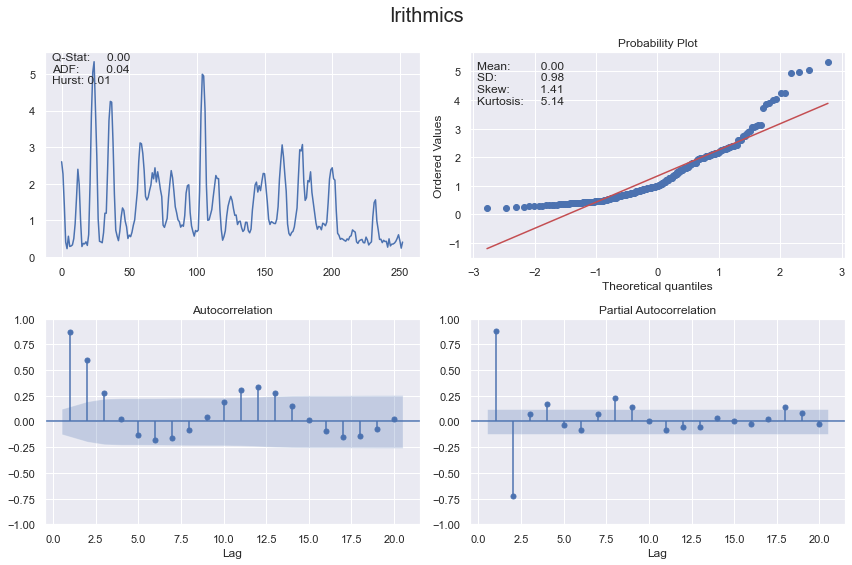

In [155]:
plot_correlogram(csvFile['shortProb'].mul(100), lags = 20, title = 'Irithmics')

In [156]:
# Calculate daily std of returns
std_daily = csvFile['shortProb'].mul(100).std()
print(f'Daily volatility: {round(std_daily,2)}%')

# Convert daily volatility to monthly volatility
std_monthly = np.sqrt(21) * std_daily
print(f'\nMonthly volatility: {round(std_monthly,2)}%')

# Convert daily volatility to annaul volatility
std_annual = np.sqrt(252) * std_daily
print(f'\nAnnual volatility: {round(std_annual,2)}%')

Daily volatility: 0.98%

Monthly volatility: 4.48%

Annual volatility: 15.53%


In [157]:
basicGarch = arch_model(csvFile['shortProb'],
                       p = 1,
                       q = 1,
                       mean = 'constant',
                       vol = 'GARCH',
                       dist = 'normal')
garchResult = basicGarch.fit(update_freq = 4)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -851.4897728950518
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3


In [158]:
print(garchResult.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              shortProb   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                851.490
Distribution:                  Normal   AIC:                          -1694.98
Method:            Maximum Likelihood   BIC:                          -1680.85
                                        No. Observations:                  253
Date:                Wed, Jun 22 2022   Df Residuals:                      252
Time:                        23:15:57   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0114  1.269e-03      9.002  2.213e-19 [8.

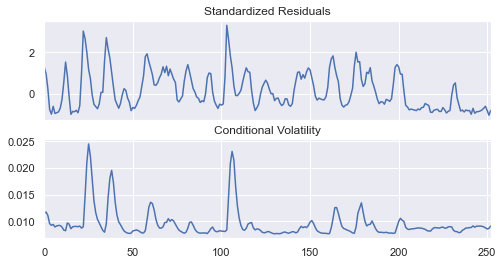

In [159]:
garchResult.plot()
plt.show()

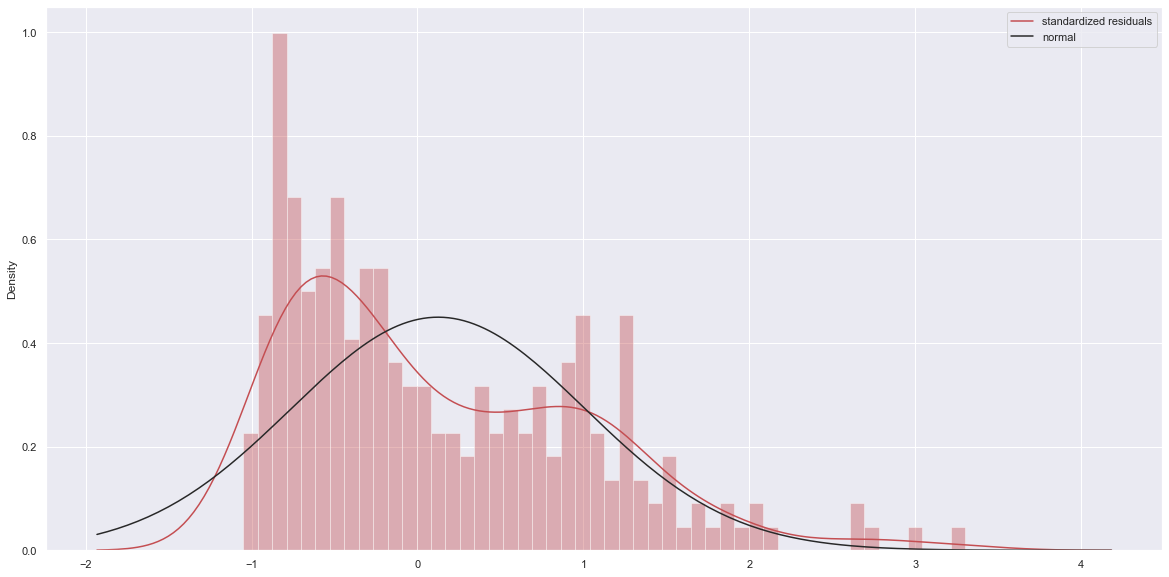

In [160]:
# Obtain model estimated residuals and volatility
garchResid = garchResult.resid
garchStd = garchResult.conditional_volatility

# Calculate the standardized residuals
garchStdResid = garchResid /garchStd

# Plot the histogram of the standardized residuals
plt.figure(figsize=(20,10))
sns.distplot(garchStdResid, color = 'r', fit = stats.norm, bins = 50)
plt.legend(('standardized residuals','normal'))
plt.show()

In [168]:
basicGarch = arch_model(csvFile['shortProb'],
                       p = 1,
                       q = 1,
                       mean = 'constant',
                       vol = 'GARCH',
                       dist = 'skewt')
garchResult = basicGarch.fit(update_freq = 4)
wank = garchResult.conditional_volatility

Iteration:      4,   Func. Count:     43,   Neg. LLF: 1568154.5912536213
Iteration:      8,   Func. Count:     85,   Neg. LLF: 2454.096296866688
Iteration:     12,   Func. Count:    129,   Neg. LLF: 1182.9922125254866
Iteration:     16,   Func. Count:    164,   Neg. LLF: -484.5395786038155
Iteration:     20,   Func. Count:    204,   Neg. LLF: 26402.737387752146
Iteration:     24,   Func. Count:    245,   Neg. LLF: 17155.070489699974
Iteration:     28,   Func. Count:    281,   Neg. LLF: -550.7697879860095
Optimization terminated successfully    (Exit mode 0)
            Current function value: -550.7697851417686
            Iterations: 32
            Function evaluations: 281
            Gradient evaluations: 28


In [170]:
tgarch = arch_model(csvFile['shortProb'],
                       p = 1,
                       q = 1,
                       mean = 'constant',
                       vol = 'GARCH',
                       dist = '')
tres = tgarch.fit()
tcond = tres.conditional_volatility

Iteration:      1,   Func. Count:      7,   Neg. LLF: 17918.179286863
Iteration:      2,   Func. Count:     23,   Neg. LLF: 768.5108769911913
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2093.1652104047216
Iteration:      4,   Func. Count:     36,   Neg. LLF: 506.70008274023684
Iteration:      5,   Func. Count:     42,   Neg. LLF: 353.1605992206306
Iteration:      6,   Func. Count:     48,   Neg. LLF: 300.0998689441699
Iteration:      7,   Func. Count:     54,   Neg. LLF: -41.136524046788274
Iteration:      8,   Func. Count:     60,   Neg. LLF: 208.3788371636391
Iteration:      9,   Func. Count:     67,   Neg. LLF: -184.2160245883655
Iteration:     10,   Func. Count:     73,   Neg. LLF: -666.850703307709
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -666.8507034132781
            Iterations: 10
            Function evaluations: 73
            Gradient evaluations: 10


C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [175]:
gedGarch = arch_model(csvFile['shortProb'],
                       p = 1,
                       q = 1,
                       mean = 'constant',
                       vol = 'GARCH',
                       dist = 'ged')
gedres = gedGarch.fit()
gedse = gedres.conditional_volatility

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2.8240006077550707e+121
Iteration:      2,   Func. Count:     22,   Neg. LLF: 362712.22233250947
Iteration:      3,   Func. Count:     38,   Neg. LLF: 2.379142205944617e+71
Iteration:      4,   Func. Count:     54,   Neg. LLF: 9.785787296153903e+35
Iteration:      5,   Func. Count:     67,   Neg. LLF: 5486284877484220.0
Iteration:      6,   Func. Count:     80,   Neg. LLF: 2693592788576.2085
Iteration:      7,   Func. Count:     92,   Neg. LLF: 4091076.0697474233
Iteration:      8,   Func. Count:    106,   Neg. LLF: -851.3067932842137
Optimization terminated successfully    (Exit mode 0)
            Current function value: -851.3067932372559
            Iterations: 12
            Function evaluations: 106
            Gradient evaluations: 8


In [1]:
# Plot model fitting results
plt.figure(figsize=(20,10))
plt.plot(garchStd, color = 'red', label = 'Normal Volatility')
#plt.plot(wank, color = 'green', label = "Skewed T Vol")
plt.plot(gedse, color = 'blue', label = "Skewed T Vol")
plt.plot(tcond, color = 'orange', label = " T Vol")
plt.plot(csvFile['shortProb'], color = 'grey', 
         label = 'Log Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

NameError: name 'plt' is not defined